Performing energy signature

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from datetime import datetime, timedelta

Function to Plotting data:
input: data to be plotted, title of the graph

In [2]:
def plotting(dat,tit):
    # model for regression
    model = sm.OLS(dat.total_power,sm.add_constant(dat.temp_diff))
    # fitting the model
    results = model.fit()
    # plotting
    plt.figure()
    plt.plot(dat.temp_diff,results.predict(),'r', linewidth=1, label='regression')
    plt.scatter(dat.temp_diff,dat.total_power, s=5, label='observations')
    plt.xlabel('deltaT [C]')
    plt.ylabel('Energy Consumption [kWh]')
    plt.title(tit)
    plt.ylim(-0.1)
    plt.legend()

importing csv file and preparing simulated data

In [3]:
# importing csv
data = pd.read_csv('/home/ict4bd/Desktop/Project/Data_Output/simulation_Data_1Year.csv',sep=',',decimal=',',index_col=0, low_memory=False)
cols = data.columns
for col in cols:
    # converting to float
    data[col] = data[col].astype(float)

time = []
for i in range(len(data.index)):
    # reading  index
    t = data.index[i]
    # splitting day and hour
    #day, hour = t.split('  ')
    timestamp = datetime.strptime(t, "%Y/%m/%d  %H:%M:%S")
    time.append(timestamp)
data.index = pd.to_datetime(time)
data

,t_in,t_out,temp_diff,power_heating,power_cooling,power_electricity,total_power
2019-01-01 01:00:00,3.68,0.93,2.750616,0.0,0.0,0.14,0.0
2019-01-01 02:00:00,3.60,0.65,2.953681,0.0,0.0,0.14,0.0
2019-01-01 03:00:00,3.60,0.85,2.751315,0.0,0.0,0.14,0.0
2019-01-01 04:00:00,3.59,0.97,2.611018,0.0,0.0,0.14,0.0
2019-01-01 05:00:00,3.57,1.00,2.566741,0.0,0.0,0.14,0.0
...,...,...,...,...,...,...,...
2019-12-31 20:00:00,12.05,0.88,11.170789,0.0,0.0,0.14,0.0
2019-12-31 21:00:00,11.91,0.57,11.338488,0.0,0.0,0.14,0.0
2019-12-31 22:00:00,11.78,0.28,11.501998,0.0,0.0,0.14,0.0
2019-12-31 23:00:00,11.65,0.20,11.449204,0.0,0.0,0.14,0.0


In [4]:
#%% SPLITTING DATA IN HOURLY, WEEKLY AND DAILY
# frequency conversion according to hour
dataH = data.resample('H').mean()
# removing missing values
dataH = dataH.dropna()
# frequency conversion according to day
dataD = data.resample('D').mean()
# removing missing values
dataD = dataD.dropna()
# frequency conversion according to week
dataW = data.resample('W').mean()
# removing missing values
dataW = dataW.dropna()
# frequency conversion according to month
dataM = data.resample('M').mean()
# removing missing values
dataM = dataM.dropna()

DIVIDING DATA IN SUMMER AND WINTER

In [5]:
dataSum = []
dataWint = []
for i in range(len(data.index)):
    t = data.index[i]
    temp = {'t_in':data.t_in[i],'t_out':data.t_out[i], 'temp_diff':data.temp_diff[i], 'power_heating':data.power_heating[i], 'power_cooling':data.power_cooling[i],'power_electricity':data.power_electricity[i], 'total_power':data.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataSum.append(temp)
    else:
        dataWint.append(temp)
dataSum = pd.DataFrame.from_dict(dataSum)
dataWint = pd.DataFrame.from_dict(dataWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - month
dataMSum = []
dataMWint = []
for i in range(len(data.index)):
    t = data.index[i]
    temp = {'t_in':data.t_in[i],'t_out':data.t_out[i], 'temp_diff':data.temp_diff[i], 'power_heating':data.power_heating[i], 'power_cooling':data.power_cooling[i],'power_electricity':data.power_electricity[i], 'total_power':data.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataMSum.append(temp)
    else:
        dataMWint.append(temp)
dataMS = pd.DataFrame.from_dict(dataMSum)
dataMW = pd.DataFrame.from_dict(dataMWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - hour
dataHSum = []
dataHWint = []
for i in range(len(dataH.index)):
    t = dataH.index[i]
    temp = {'t_in':dataH.t_in[i],'t_out':dataH.t_out[i], 'temp_diff':dataH.temp_diff[i], 'power_heating':dataH.power_heating[i], 'power_cooling':dataH.power_cooling[i],'power_electricity':dataH.power_electricity[i], 'total_power':dataH.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataHSum.append(temp)
    else:
        dataHWint.append(temp)
dataHS = pd.DataFrame.from_dict(dataHSum)
dataHW = pd.DataFrame.from_dict(dataHWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - week
dataWSum = []
dataWWint = []
for i in range(len(dataW.index)):
    t = dataW.index[i]
    temp = {'t_in':dataW.t_in[i],'t_out':dataW.t_out[i], 'temp_diff':dataW.temp_diff[i], 'power_heating':dataW.power_heating[i], 'power_cooling':dataW.power_cooling[i],'power_electricity':dataW.power_electricity[i], 'total_power':dataW.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataWSum.append(temp)
    else:
        dataWWint.append(temp)
dataWS = pd.DataFrame.from_dict(dataWSum)
dataWW = pd.DataFrame.from_dict(dataWWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - day
dataDSum = []
dataDWint = []
for i in range(len(dataD.index)):
    t = dataD.index[i]
    temp = {'t_in':dataD.t_in[i],'t_out':dataD.t_out[i], 'temp_diff':dataD.temp_diff[i], 'power_heating':dataD.power_heating[i], 'power_cooling':dataD.power_cooling[i],'power_electricity':dataD.power_electricity[i], 'total_power':dataD.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataDSum.append(temp)
    else:
        dataDWint.append(temp)
dataDS = pd.DataFrame.from_dict(dataDSum)
dataDW = pd.DataFrame.from_dict(dataDWint)

REGRESSION (Ordinary Least Square) - winter

/home/ict4bd/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


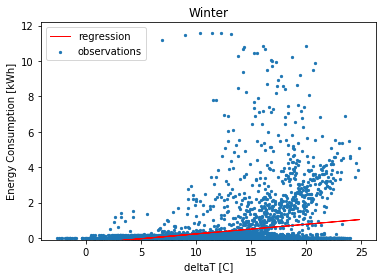

In [6]:
plotting(dataWint, 'Winter')

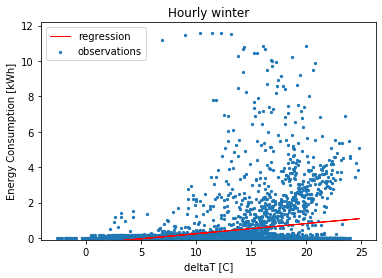

In [7]:
plotting(dataHW, 'Hourly winter')

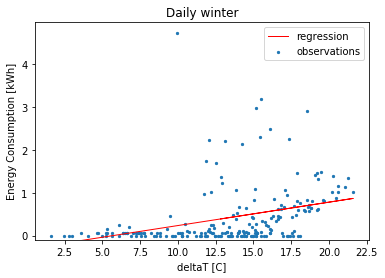

In [8]:
plotting(dataDW, 'Daily winter')

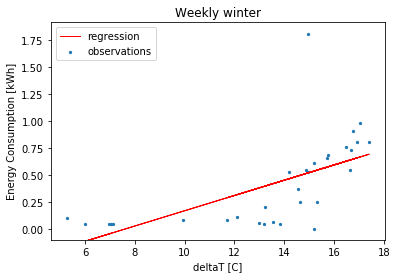

In [9]:
plotting(dataWW, 'Weekly winter')

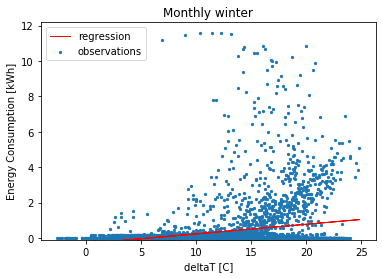

In [10]:
plotting(dataMW, 'Monthly winter')

REGRESSION (Ordinary Least Square) - summer

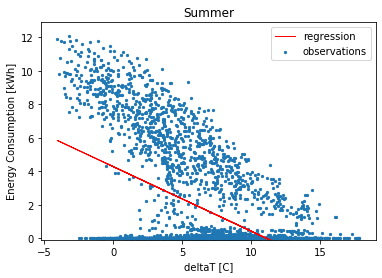

In [11]:
plotting(dataSum, 'Summer')

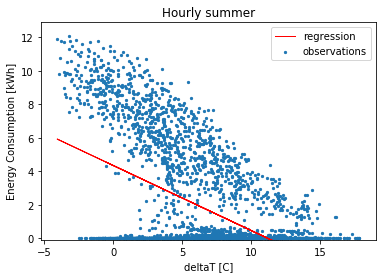

In [12]:
plotting(dataHS, 'Hourly summer')

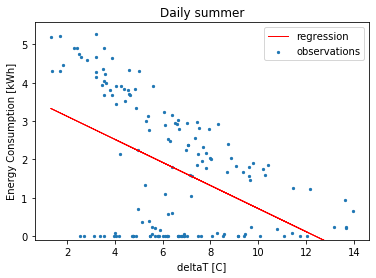

In [13]:
plotting(dataDS,'Daily summer')

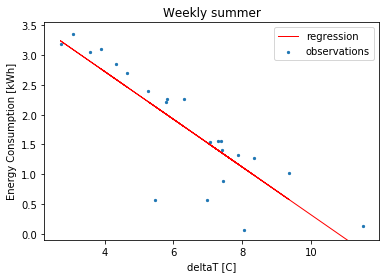

In [14]:
plotting(dataWS, 'Weekly summer')

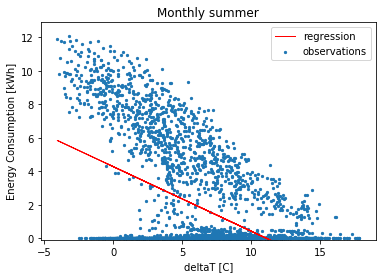

In [15]:
plotting(dataMS, 'Monthly summer')